In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
import sys
os.chdir('/content/drive/My Drive/ProyectoIA2/generative-spectral-datasets')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import numpy as np
from models.main import make_encoder, make_generator, make_discriminator, spectralGAN
from models.utils import discriminator_loss, autoencoder_loss
from models.metrics import PSNR, SSIM
from data import load_dataset

import matplotlib.pyplot as plt

input_shape = (512,512,31)

In [3]:
BATCH_SIZE = 3

train_params = dict(
    batch_size = BATCH_SIZE,
    shuffle = True,
    cache = True
)

test_params = dict(
    batch_size = BATCH_SIZE,
    cache = True
)

train_ds , test_ds = load_dataset( train_params = train_params, test_params = test_params)

In [4]:
a_optimizer = tf.keras.optimizers.Adam(1e-4)
d_optimizer = tf.keras.optimizers.Adam(1e-4)

FACTOR = [ 1 , 1 , 1/2 , 1/2 , 1/4, 1/8]
features= 64

encoder = make_encoder(input_shape, features=features, factors=FACTOR)
generator = make_generator(input_shape, features=features, factors=FACTOR)
discriminator = make_discriminator(input_shape)

In [5]:
encoder.summary()
generator.summary()
discriminator.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 31)]    0         
_________________________________________________________________
encoder (Encoder)            (None, 512, 512, 8)       59184     
Total params: 59,184
Trainable params: 59,184
Non-trainable params: 0
_________________________________________________________________
Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 512, 512, 8)]     0         
_________________________________________________________________
generator (Generator)        (None, 512, 512, 31)      59230     
Total params: 59,230
Trainable params: 59,230
Non-trainable params: 0
_________________________________________________________________
Model: "discriminator"
_________

In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = spectralGAN(encoder=encoder, generator=generator, discriminator=discriminator)

model.compile(
    a_optimizer = a_optimizer,
    d_optimizer = d_optimizer,
    a_loss = autoencoder_loss,
    d_loss = discriminator_loss,
    metrics = [ PSNR() ]
)


callbacks = [
             ModelCheckpoint( 'spectralGAN.h5', monitor='val_psnr',  verbose=1,  save_best_only=True,  save_weights_only=True,  mode="max", )
]

_ = model.__call__(next(iter(train_ds)))
model.load_weights('spectralGAN.h5')

In [9]:
# model.fit(train_ds, epochs=300, validation_data=test_ds, callbacks=callbacks)

In [10]:
# model.save_weights('spectralGAN.h5')

In [11]:
model.summary()

Model: "spectral_gan"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Functional)         (None, 512, 512, 8)       59184     
_________________________________________________________________
generator (Functional)       (None, 512, 512, 31)      59230     
_________________________________________________________________
sequential (Sequential)      (None, 512, 512, 31)      118414    
_________________________________________________________________
discriminator (Functional)   (None, 127, 127, 1)       41985     
Total params: 160,399
Trainable params: 160,143
Non-trainable params: 256
_________________________________________________________________


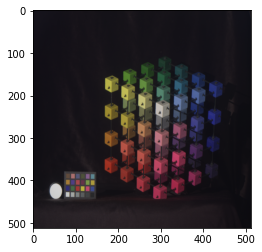

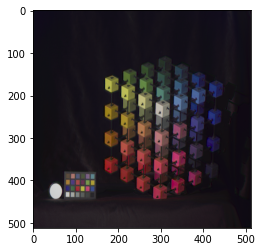

In [12]:
sample = next(iter(train_ds)).numpy()
generated = model.autoencoder.predict(sample)

num = 0
RGB = [ 24, 15 , 5]

x_true = np.power( sample, 0.5 )
x_pred = np.power( generated, 0.5 )

plt.imshow(x_true[num][:,:,RGB])
plt.show()

plt.imshow(x_pred[num][:,:,RGB])
plt.show()


In [13]:
model.summary()

Model: "spectral_gan"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Functional)         (None, 512, 512, 8)       59184     
_________________________________________________________________
generator (Functional)       (None, 512, 512, 31)      59230     
_________________________________________________________________
sequential (Sequential)      (None, 512, 512, 31)      118414    
_________________________________________________________________
discriminator (Functional)   (None, 127, 127, 1)       41985     
Total params: 160,399
Trainable params: 160,143
Non-trainable params: 256
_________________________________________________________________
